# <font color = purple> ONLINE EDUCATION SYSTEM REVIEW 
#### *Данный датасет был выбран в соответствии с темой ВКР, посвященной изучению EdTech-индустрии.
## This data collection aims to analyze the impact of online education as the pandemic has forced us into online education.

### Data Dictionary

Gender – Male, Female  
Home Location – Rural, Urban  
Level of Education – Post Graduate, School, Under Graduate  
Age – Years  
Number of Subjects – 1-20   
Device type used to attend classes – Desktop, Laptop, Mobile  
Economic status – Middle Class, Poor, Rich  
Family size – 1-10  
Internet facility in your locality – Number scale (Very Bad to Very Good)  
Are you involved in any sports? – Yes, No  
Do elderly people monitor you? – Yes, No  
Study time – Hours  
Sleep time – Hours  
Time spent on social media – Hours  
Interested in Gaming? – Yes, No  
Have separate room for studying? – Yes, No  
Engaged in group studies? – Yes, No  
Average marks scored before pandemic in traditional classroom – range  
Your interaction in online mode - Number scale (Very Bad to Very Good)  
Clearing doubts with faculties in online mode - Number scale (Very Bad to Very Good)  
Interested in? – Practical, Theory, Both  
Performance in online - Number scale (Very Bad to Very Good)  
Your level of satisfaction in Online Education – Average, Bad, Good  

In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ed = pd.read_csv('/Users/olesya/Desktop/ONLINE EDUCATION SYSTEM REVIEW.csv', sep = ',')
ed

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,Yes,...,4,Yes,Yes,yes,91-100,4,4,Theory,8,Average
1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,No,...,2,Yes,Yes,No,71-80,5,5,Theory,10,Average
1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,No,...,3,No,Yes,yes,71-80,2,2,Theory,6,Average
1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,Yes,...,2,Yes,No,No,61-70,3,3,Both,6,Good


### 0. Подготовка датасета
#### Работа с типами данных, пропущенными данными, заголовками и др.

In [713]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

<font color = blue> Обратим внимание на типы данных. Многим колонкам, которые по сути и содержанию относятся скорее к категориальным или бинарным (буллиевым), присвоен тип object. Перекодируем такие колонки в соответствующий их данным тип – 7 в категориальный и 5 в буллиевый.

In [714]:
ed['Home Location'] = pd.Categorical(ed['Home Location'])
ed['Level of Education'] = pd.Categorical(ed['Level of Education'])
ed['Device type used to attend classes'] = pd.Categorical(ed['Device type used to attend classes'])
ed['Economic status'] = pd.Categorical(ed['Economic status'])
ed['Interested in?'] = pd.Categorical(ed['Interested in?'])
ed['Your level of satisfaction in Online Education'] = pd.Categorical(ed['Your level of satisfaction in Online Education'])
ed['Gender'] = pd.Categorical(ed['Gender'])
ed['Average marks scored before pandemic in traditional classroom'] = pd.Categorical(ed['Average marks scored before pandemic in traditional classroom'])

In [715]:
ed['Are you involved in any sports?'] = ed['Are you involved in any sports?'] == 'Yes'
ed['Do elderly people monitor you?'] = ed['Do elderly people monitor you?'] == 'Yes'
ed['Interested in Gaming?'] = ed['Interested in Gaming?'] == 'Yes'
ed['Have separate room for studying?'] = ed['Have separate room for studying?'] == 'Yes'
ed['Engaged in group studies?'] = ed['Engaged in group studies?'] == 'Yes'

<font color = blue> Проверим, что колонкам действительно присвоился необходимый тип данных – в датафрейме не осталось строковых данных object, далее мы будем работать с данными типа category, int и bool.

In [716]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   Gender                                                         1033 non-null   category
 1   Home Location                                                  1033 non-null   category
 2   Level of Education                                             1033 non-null   category
 3   Age(Years)                                                     1033 non-null   int64   
 4   Number of Subjects                                             1033 non-null   int64   
 5   Device type used to attend classes                             1033 non-null   category
 6   Economic status                                                1033 non-null   category
 7   Family size                                        

<font color = blue> Видим, что согласно df.info в датасете отсутствуют пропущенные значения – в каждой колонке зафиксировано 1033 наблюдения. Соответственно, при выполнении данной работы нам не потребуется заполнять ячейки NA какими-либо данными. На всякий случай дополнительно применим функцию isna, чтобы убедиться в этом.

In [717]:
ed.isna().sum()

Gender                                                           0
Home Location                                                    0
Level of Education                                               0
Age(Years)                                                       0
Number of Subjects                                               0
Device type used to attend classes                               0
Economic status                                                  0
Family size                                                      0
Internet facility in your locality                               0
Are you involved in any sports?                                  0
Do elderly people monitor you?                                   0
Study time (Hours)                                               0
Sleep time (Hours)                                               0
Time spent on social media (Hours)                               0
Interested in Gaming?                                         

<font color = blue>  В качестве последнего этапа переименуем некоторые колонки, присвоив им более сжатые названия для оперативности работы над датасетом (для удобства и единообразия датасета оставим английский язык).

In [718]:
ed.rename(columns = {'Gender':'Sex', 'Home Location': 'Home Loc', 'Age(Years)':'Age', 
                       'Number of Subjects':'Number of Subjects', 'Device type used to attend classes':'Device Type', 
                       'Economic status':'Economic Status','Family size':'Family Size',
                       'Internet facility in your locality':'Internet Facility',
                       'Are you involved in any sports?':'Sports Involved',
                       'Do elderly people monitor you?':'Monitored by Adults','Study time (Hours)':'Study Time',
                       'Sleep time (Hours)': 'Sleep Time', 'Time spent on social media (Hours)':'Social Media Time',
                       'Interested in Gaming?': 'Gaming Interested', 'Have separate room for studying?':'Separate Room',
                       'Engaged in group studies?': 'Group Studies Engaged',
                       'Average marks scored before pandemic in traditional classroom':'Av. Mark Before Pandemic',
                       'Your interaction in online mode': 'Online Interaction',
                       'Clearing doubts with faculties in online mode': 'Doubts',
                       'Interested in?': 'Interested in?', 'Performance in online':'Online Performance',
                       'Your level of satisfaction in Online Education':'Satisfaction Level'},
            inplace = True)

In [719]:
ed.head()

,Sex,Home Loc,Level of Education,Age,Number of Subjects,Device Type,Economic Status,Family Size,Internet Facility,Sports Involved,...,Social Media Time,Gaming Interested,Separate Room,Group Studies Engaged,Av. Mark Before Pandemic,Online Interaction,Doubts,Interested in?,Online Performance,Satisfaction Level
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,False,...,1,False,False,False,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,True,...,1,True,True,False,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,False,...,1,False,True,False,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,True,...,2,False,False,False,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,False,...,2,True,True,False,81-90,3,3,Both,6,Average


### 1. Создание новых переменных
#### Создадим некоторые новые переменные на основе уже имеющихся в датасете данных

<font color = blue> Например, создадим новую категориальную переменную, которую назовем "Pre-pandemic Academic Perfomance", в которой на основе столбца со средними оценками до пандемии ("Av. Mark Before Pandemic") разделим наблюдения по категориям. Прежде всего, посмотрим, какие наблюдения вообще есть в этой колонке, а затем решим, на какие категории их разбить.

In [720]:
ed['Av. Mark Before Pandemic'].value_counts()

81-90     343
71-80     313
91-100    158
61-70     118
51-60      52
41-50      24
31-40      11
21-30       7
11-20       6
0-10        1
Name: Av. Mark Before Pandemic, dtype: int64

<AxesSubplot:>

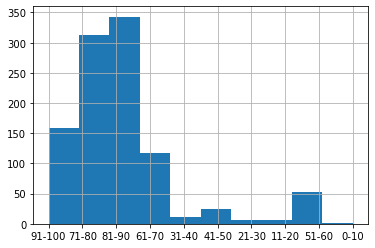

In [721]:
ed['Av. Mark Before Pandemic'].hist()

<font color = blue> Выделим 5 классических категорий успеваемости – A (excellent), B (good), С (average), D (below average) и E (inadequate). Воспользуемся международной системой оценивания и переведем имеющиеся баллы в оценки с помощью специальной функции. Затем применим функции к значениям колонки с оценками и запишем данные в новую колонку, в которой будет отображен уровень академической успеваемости до пандемии по пяти категориям.

In [722]:
def get_mark_cat(mark):
    if mark == '0-10':
        return 'E (inadequate)'
    elif mark == '11-20':
        return 'E (inadequate)'
    elif mark == '21-30':
        return 'E (inadequate)'
    elif mark == '31-40':
        return 'E (inadequate)'
    elif mark == '41-50':
        return 'D (below average)'
    elif mark == '51-60':
        return 'D (below average)'
    elif mark == '61-70':
        return 'С (average)'
    elif mark == '71-80':
        return 'С (average)'
    elif mark == '81-90':
        return 'B (good)'
    elif mark == '91-100':
        return 'A (excellent)'
    else:
        return mark

In [723]:
ed['Pre-pandemic Academic Perfomance'] = ed['Av. Mark Before Pandemic'].apply(get_mark_cat)

In [724]:
ed.head()

,Sex,Home Loc,Level of Education,Age,Number of Subjects,Device Type,Economic Status,Family Size,Internet Facility,Sports Involved,...,Gaming Interested,Separate Room,Group Studies Engaged,Av. Mark Before Pandemic,Online Interaction,Doubts,Interested in?,Online Performance,Satisfaction Level,Pre-pandemic Academic Perfomance
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,False,...,False,False,False,91-100,1,1,Practical,6,Average,A (excellent)
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,True,...,True,True,False,91-100,1,1,Theory,3,Bad,A (excellent)
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,False,...,False,True,False,71-80,1,1,Both,6,Bad,С (average)
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,True,...,False,False,False,91-100,1,2,Theory,4,Bad,A (excellent)
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,False,...,True,True,False,81-90,3,3,Both,6,Average,B (good)


<font color = blue> Перекодируем новую переменную как категориальную. Затем проверим, какие категории записались в новый столбец и визуализируем данные по распределению оценок на простом графике.

In [725]:
ed['Pre-pandemic Academic Perfomance'] = pd.Categorical(ed['Pre-pandemic Academic Perfomance'])

In [726]:
ed['Pre-pandemic Academic Perfomance'].cat.categories

Index(['A (excellent)', 'B (good)', 'D (below average)', 'E (inadequate)',
       'С (average)'],
      dtype='object')

<AxesSubplot:>

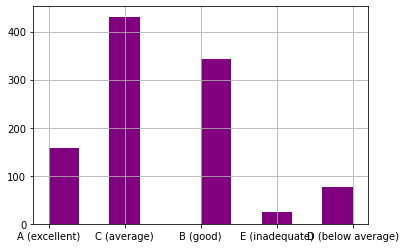

In [727]:
ed['Pre-pandemic Academic Perfomance'].hist(color = 'purple')

<font color = blue> Получаем наглядное представление о том, какие оценки имели учащиеся до пандемии – большинство из них получали C и B, то есть средние и хорошие оценки (от 61 до 90 баллов согласно заданной выше функции).

<font color = blue> Теперь обратим внимание на то, что оценки до пандемии и уровень успеваемости онлайн представлены в разном формате – по 100-балльной и 10-балльной шкалам. Приведем оценки до пандемии к 10-балльной шкале (округляем в большую сторону), чтобы в будущем мы могли сравнивать эти наблюдения. Применим функцию к оригинальной колонке и перезапишем ее, изменив тип данных на int.

In [728]:
def get_mark(mark):
    if mark == '0-10':
        return '1'
    elif mark == '11-20':
        return '2'
    elif mark == '21-30':
        return '3'
    elif mark == '31-40':
        return '4'
    elif mark == '41-50':
        return '5'
    elif mark == '51-60':
        return '6'
    elif mark == '61-70':
        return '7'
    elif mark == '71-80':
        return '8'
    elif mark == '81-90':
        return '9'
    elif mark == '91-100':
        return '10'
    else:
        return mark

In [729]:
ed['Av. Mark Before Pandemic'] = ed['Av. Mark Before Pandemic'].apply(get_mark)
ed = ed.astype({'Av. Mark Before Pandemic': 'int64'})

In [730]:
ed[['Av. Mark Before Pandemic', 'Online Performance']]
#теперь мы можем сравнивать данные наблюдения, так как они содержат оценки одного порядка и типа

,Av. Mark Before Pandemic,Online Performance
0,10,6
1,10,3
2,8,6
3,10,4
4,9,6
...,...,...
1028,10,8
1029,8,10
1030,8,6
1031,7,6


### 2. Группировка данных и базовая визуализация
#### Работа с частотными таблицами, распределениями и группировкой данных 

<font color = blue> Построим частотные таблицы для нескольких переменных, проанализируем и сделаем первые выводы о датафрейме.

In [731]:
ed['Sex'].value_counts() #соотношение мужчин и женщин примерно 60% и 40%

Male      614
Female    419
Name: Sex, dtype: int64

In [732]:
ed['Home Loc'].value_counts() #большинство участников проживают в городе, почти треть – за городом

Urban    679
Rural    354
Name: Home Loc, dtype: int64

In [733]:
ed['Level of Education'].value_counts() 
#абсолютное большинство имеет степень бакалавра, 87 человек закончили только школу, 129 – получили магистерскую степень

Under Graduate    817
Post Graduate     129
School             87
Name: Level of Education, dtype: int64

In [734]:
ed['Age'].value_counts() #получаем частотную таблицу по возрастам, представим эти же данные на графике

20    249
19    226
18    220
21    127
17     99
22     39
23     19
24     14
40      9
25      7
34      3
37      3
26      3
12      2
9       2
39      2
36      2
38      1
27      1
28      1
30      1
32      1
35      1
29      1
Name: Age, dtype: int64

<AxesSubplot:>

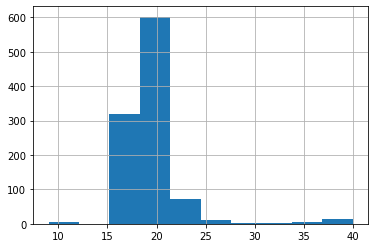

In [735]:
ed['Age'].hist() #видим, что возраст большинства опрошенных варьируется в диапазоне от 15 до 21 года

In [736]:
ed['Device Type'].value_counts() 
#большинство учащихся пользуется ноутбуками, около 33% – телефонами, незначительная часть – стационарными компьютерами

Laptop     672
Mobile     334
Desktop     27
Name: Device Type, dtype: int64

In [737]:
ed['Economic Status'].value_counts() 
#абсолютное большинство принадлежат к среднему классу, около 5% и 3% к бедному и богатому слоям соответственно
#идея для проверки гипотезы в будущем – "чем богаче семья, тем лучше успеваемость"

Middle Class    954
Poor             49
Rich             30
Name: Economic Status, dtype: int64

In [738]:
ed['Family Size'].value_counts() 
#получаем частотную таблицу по кол-ву детей в семье, представим эти же данные на графике

4     569
5     192
3     128
6      87
10     18
7      14
2      11
8       9
9       5
Name: Family Size, dtype: int64

<AxesSubplot:>

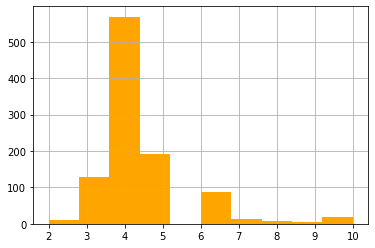

In [739]:
ed['Family Size'].hist(color='orange')
#большинство семей – многодетные, т.е. имеют 3 и более детей, минимальное кол-во детей – 2 на семью

In [740]:
ed['Separate Room'].value_counts()
#около 60% учащихся имеют собственную отдельную комнату
#идея для проверки гипотезы в будущем – "успеваемость у тех, кто имеет отдельную комнату, выше, чем у тех, кто не имеет"

True     608
False    425
Name: Separate Room, dtype: int64

In [741]:
ed['Gaming Interested'].value_counts()
#заинтересованных и не заинтересованных в компьютерных играх сопоставимое кол-во

True     560
False    473
Name: Gaming Interested, dtype: int64

In [742]:
ed['Sleep Time'].value_counts()
#получаем частотную таблицу по кол-ву часов сна, представим эти же данные на графике

7     316
8     296
6     235
5      78
9      42
10     30
4      23
3       5
2       4
1       4
Name: Sleep Time, dtype: int64

<AxesSubplot:>

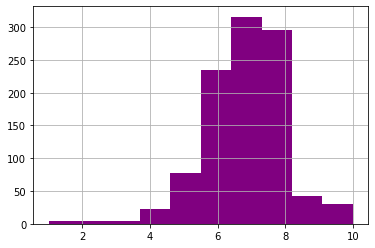

In [743]:
ed['Sleep Time'].hist(color='purple')
#распределение по кол-ву часов сна стремится к нормальному в виде колокольчика – большинство спит от 7 до 8 часов
#идея для проверки гипотезы в будущем – "кол-во сна положительно влияет на успеваемость"

In [744]:
ed['Social Media Time'].value_counts()
#получаем частотную таблицу по кол-ву часов в соцсетях, представим эти же данные на графике

2     340
1     294
3     181
4      92
5      49
6      26
10     19
8      16
7      12
9       4
Name: Social Media Time, dtype: int64

<AxesSubplot:>

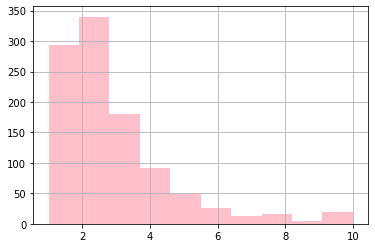

In [745]:
ed['Social Media Time'].hist(color='pink')
#распределение смещено влево – большинство проводит в соцсетях от получаса до 2,5 часов в день
#идея для проверки гипотезы в будущем – "кол-во времени в соцсетях отрицательно влияет на успеваемость"

In [746]:
ed['Av. Mark Before Pandemic'].value_counts()
#получаем частотную таблицу по успеваемости до пандемии, представим эти же данные на графике

9     343
8     313
10    158
7     118
6      52
5      24
4      11
3       7
2       6
1       1
Name: Av. Mark Before Pandemic, dtype: int64

<AxesSubplot:>

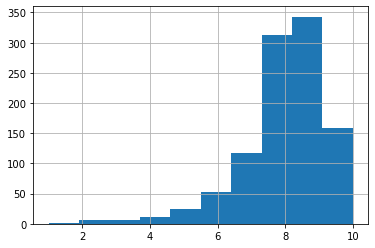

In [747]:
ed['Av. Mark Before Pandemic'].hist()
#большинство учеников имели среднюю успеваемость от 8 до 9 во время занятий офлайн до пандемии

In [748]:
ed['Online Performance'].value_counts()
#получаем частотную таблицу по успеваемости в онлайне, представим эти же данные на графике

6     244
8     218
7     181
5      92
10     87
4      78
9      73
2      37
3      23
Name: Online Performance, dtype: int64

<AxesSubplot:>

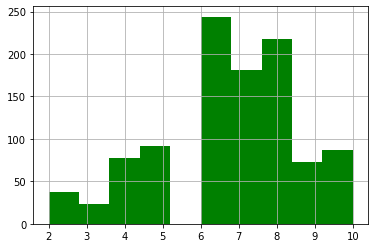

In [749]:
ed['Online Performance'].hist(color='green')
#большинство учеников имеют среднюю успеваемость от 6 до 8 во время занятий онлайн

<font color = blue> Далее попробуем сгруппировать некоторые колонки и проанализировать результаты.   
    Например, посмотрим, как распределяются оценки до и после пандемии среди мужчин и женщин. С помощью функции группировки мы получили частотную таблицу, где оценки отображаются по полу. В целом, данные по оценкам соответствуют процентному соотношению мужчин и женщин в датасете – 60% и 40% соответственно.

In [750]:
ed.groupby('Sex')['Av. Mark Before Pandemic'].value_counts().unstack()

Av. Mark Before Pandemic,1,2,3,4,5,6,7,8,9,10
Sex,,,,,,,,,,
Female,1.0,3.0,3.0,4.0,13.0,21.0,40.0,124.0,137.0,73.0
Male,NaN,3.0,4.0,7.0,11.0,31.0,78.0,189.0,206.0,85.0


In [751]:
ed.groupby('Sex')['Online Performance'].value_counts().unstack()

Online Performance,2,3,4,5,6,7,8,9,10
Sex,,,,,,,,,
Female,5,8,29,43,95,74,78,33,54
Male,32,15,49,49,149,107,140,40,33


<font color = blue> Посмотрим также, как сгруппированы оценки до пандемии по материальному положению людей. Видим, что богатые слои населения получают оценки от 6 до 10, а худшая оценка 1 получена человеком из бедной семьи. При этом высших оценок (10) среди самых бедных и самых богатых почти одинаковое количество.

In [752]:
ed.groupby('Economic Status')['Av. Mark Before Pandemic'].value_counts().unstack()

Av. Mark Before Pandemic,1,2,3,4,5,6,7,8,9,10
Economic Status,,,,,,,,,,
Middle Class,NaN,6.0,7.0,10.0,22.0,48.0,111.0,292.0,321.0,137.0
Poor,1.0,NaN,NaN,1.0,2.0,3.0,6.0,11.0,15.0,10.0
Rich,NaN,NaN,NaN,NaN,NaN,1.0,1.0,10.0,7.0,11.0


<font color = blue> Можем попробовать рассмотреть группировку по материальному положению и месту жительства – видим достаточно предсказуемые данные о том, что бедное население в основном живет вне города, богатый же слой, наоборот, практически полностью состоит из городских жителей.

In [753]:
ed.groupby('Economic Status')['Home Loc'].value_counts().unstack()

,Rural,Urban
Economic Status,,
Middle Class,316,638
Poor,35,14
Rich,3,27


<font color = blue> Проверим распределение оценок после начала пандемии во время онлайн-обучения, сгруппированное по типу гаджета учащегося и по тому, имеет ли человек собственную отдельную комнату для занятий. Оценки распределены достаточно равномерно, закономерности при разведочном анализе не просматриваются. От наличия собственной комнаты оценки, кажется, также не зависят.

In [754]:
ed.groupby('Device Type')['Online Performance'].value_counts().unstack()

Online Performance,2,3,4,5,6,7,8,9,10
Device Type,,,,,,,,,
Desktop,1.0,NaN,1.0,3.0,8.0,1.0,9.0,1.0,3.0
Laptop,26.0,15.0,47.0,59.0,172.0,116.0,149.0,49.0,39.0
Mobile,10.0,8.0,30.0,30.0,64.0,64.0,60.0,23.0,45.0


In [755]:
ed.groupby('Separate Room')['Online Performance'].value_counts().unstack()

Online Performance,2,3,4,5,6,7,8,9,10
Separate Room,,,,,,,,,
False,17,12,39,47,98,71,80,24,37
True,20,11,39,45,146,110,138,49,50


### 3. Описательные статистики
#### Меры центральной тенденции

<font color = blue> Рассчитаем меры центральной тенденции и разброса по количественным данным из нашего датасета с помощью метода describe. Мы можем применить метод describe на весь датасет, чтобы получить агрегированную таблицу по всем столбцам с расчетом мер центральной тенденции.

In [756]:
ed.describe()

,Age,Number of Subjects,Family Size,Internet Facility,Study Time,Sleep Time,Social Media Time,Av. Mark Before Pandemic,Online Interaction,Doubts,Online Performance
count,1033.000000,1033.00000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,19.798645,7.03485,4.413359,3.586641,4.325266,6.947725,2.636980,8.235237,2.930300,2.833495,6.696031
std,3.199158,2.81034,1.236750,1.026063,2.134233,1.324039,1.859625,1.418263,1.105387,1.163629,1.920048
min,9.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,18.000000,6.00000,4.000000,3.000000,3.000000,6.000000,1.000000,8.000000,2.000000,2.000000,6.000000
50%,19.000000,7.00000,4.000000,4.000000,4.000000,7.000000,2.000000,8.000000,3.000000,3.000000,7.000000
75%,20.000000,8.00000,5.000000,4.000000,6.000000,8.000000,3.000000,9.000000,4.000000,4.000000,8.000000
max,40.000000,20.00000,10.000000,5.000000,10.000000,10.000000,10.000000,10.000000,5.000000,5.000000,10.000000


<font color = blue> Воспользуемся функциями по расчету мер центральной тенденции на сгруппированных данных.   
    Например, посмотрим, какие оценки в среднем получают студенты, сгруппированные по материальному положению.

In [757]:
ed.groupby('Economic Status')['Av. Mark Before Pandemic'].mean()
#видим, что среди всех групп средний балл практически одинаковый; чуть выше у студентов, принадлежащих к богатому слою

Economic Status
Middle Class    8.221174
Poor            8.122449
Rich            8.866667
Name: Av. Mark Before Pandemic, dtype: float64

In [758]:
ed.groupby('Economic Status')['Online Performance'].mean()
#оценки за обучение онлайн-формате в общем снизились
#разрыв между ср. оценкой богатых студентов и остальных увеличился и составил около 1 балла

Economic Status
Middle Class    6.693920
Poor            6.367347
Rich            7.300000
Name: Online Performance, dtype: float64

<font color = blue> Посмотрим, сколько в среднем проводят времени за учебой, спят и сколько тратят на соцсети студенты с определенными средними оценками.

In [759]:
ed.groupby('Av. Mark Before Pandemic')['Study Time'].mean()
#больше всех времени на учебу тратят студенты со средней оценкой 3 до пандемии (5 часов)

Av. Mark Before Pandemic
1     2.000000
2     2.833333
3     5.000000
4     3.454545
5     3.375000
6     3.826923
7     4.025424
8     4.303514
9     4.504373
10    4.613924
Name: Study Time, dtype: float64

In [760]:
ed.groupby('Online Performance')['Study Time'].mean()
#для оценок за обучение в формате онлайн результаты другие – больше всех времени тратят студенты со средней оценкой 9

Online Performance
2     3.945946
3     3.217391
4     3.782051
5     3.945652
6     4.372951
7     4.325967
8     4.440367
9     5.068493
10    4.620690
Name: Study Time, dtype: float64

In [761]:
ed.groupby('Av. Mark Before Pandemic')['Sleep Time'].mean()
#те, кто в среднем получают баллы 2-3 спят столько же, сколько студенты со средним баллом 7-10

Av. Mark Before Pandemic
1     7.000000
2     6.333333
3     6.571429
4     5.363636
5     7.541667
6     7.192308
7     6.940678
8     6.955272
9     6.915452
10    6.987342
Name: Sleep Time, dtype: float64

In [762]:
ed.groupby('Av. Mark Before Pandemic')['Social Media Time'].mean()
#больше всего времени в соцсетях проводят те, чья средняя оценка равна 3-4 баллам

Av. Mark Before Pandemic
1     1.000000
2     2.166667
3     5.142857
4     4.909091
5     3.625000
6     3.153846
7     2.847458
8     2.539936
9     2.463557
10    2.487342
Name: Social Media Time, dtype: float64

<font color = blue> С помощью функции agg и через анонимную функцию lambda мы также можем найти значение моды для категориальных данных – посмотрим на то, какой тип деятельности больше интересует мужчина и женщин, а также на какой балл наиболее часто встречается среди: 1) мужчин и женщин, 2) жителей города и области, 3) населения разного уровня обеспеченности, 4) интересующихся играми.

In [763]:
ed.groupby('Sex')['Interested in?'].agg(lambda x: x.value_counts().index[0])
#и мужчин, и женщин больше интересуют практические занятия

Sex
Female    Practical
Male      Practical
Name: Interested in?, dtype: object

In [764]:
ed.groupby('Sex')['Av. Mark Before Pandemic'].agg(lambda x: x.value_counts().index[0])
#и среди мужчин, и среди женщин наиболее часто встречается балл 9

Sex
Female    9
Male      9
Name: Av. Mark Before Pandemic, dtype: int64

In [765]:
ed.groupby('Sex')['Online Performance'].agg(lambda x: x.value_counts().index[0])
#для онлайн-обучения в обоих случаях самая популярная оценка снизилась и стала равна 6

Sex
Female    6
Male      6
Name: Online Performance, dtype: int64

In [766]:
ed.groupby('Economic Status')['Av. Mark Before Pandemic'].agg(lambda x: x.value_counts().index[0])
#С по-прежнему встречается чаще всего для бедного населения и среднего класса, среди богатых – наивысший балл встречается чаще всего

Economic Status
Middle Class     9
Poor             9
Rich            10
Name: Av. Mark Before Pandemic, dtype: int64

In [767]:
ed.groupby('Economic Status')['Online Performance'].agg(lambda x: x.value_counts().index[0])
#в формате онлайн для бедного населения и среднего класса наиболее частая оценка стала ниже, среди богатых – наивысший балл по-прежнему встречается чаще всего

Economic Status
Middle Class     6
Poor             6
Rich            10
Name: Online Performance, dtype: int64

In [768]:
ed.groupby('Home Loc')['Av. Mark Before Pandemic'].agg(lambda x: x.value_counts().index[0])

Home Loc
Rural    8
Urban    9
Name: Av. Mark Before Pandemic, dtype: int64

In [769]:
ed.groupby('Home Loc')['Online Performance'].agg(lambda x: x.value_counts().index[0])

Home Loc
Rural    6
Urban    6
Name: Online Performance, dtype: int64

In [770]:
ed.groupby('Gaming Interested')['Av. Mark Before Pandemic'].agg(lambda x: x.value_counts().index[0])

Gaming Interested
False    9
True     9
Name: Av. Mark Before Pandemic, dtype: int64

In [771]:
ed.groupby('Gaming Interested')['Online Performance'].agg(lambda x: x.value_counts().index[0])

Gaming Interested
False    6
True     6
Name: Online Performance, dtype: int64

<font color = blue> Таким образом, проведя первичный анализ данных, мы можем прийти к выводу, что в среднем оценки за онлайн-обучени хуже, чем до пандемии. Наиболее часто самые высокие оценки встречаются среди богатого населения. После перехода в онлайн одновременно с общим ухудшением средних оценок увеличился разрыв между ср. оценками богатых слоев населения и остальными студентами. В подавляющем большинстве при анализе сгруппированных данных наиболее часто встречающиеся оценки – 6 для онлайн-обучения и 9 во время обучения до пандемии.

#### Меры разброса

<font color = blue> Сгруппируем данные по уровню удовлетворенности онлайн-образованием и академической успеваемости во время обучения онлайн с помощью groupby, а затем запишем этот мини-датафрейм в отдельную переменную.

In [772]:
satisfaction_level = pd.DataFrame(ed.groupby('Satisfaction Level')['Online Performance'].mean())

<font color = blue> Посмотрим, как полученное распределение выглядит на графике.

<AxesSubplot:xlabel='Satisfaction Level'>

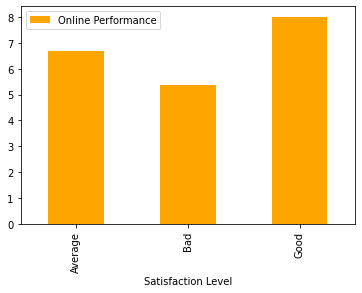

In [773]:
satisfaction_level.plot(kind = 'bar', color = 'orange')
#на графике видим, что студенты с наиболее низкими оценками наименее удовлетворены процессом обучения

<font color = blue> Далее перейдем к расчетам мер разброса. Начнем с размаха по переменной "Online Performance". Чтобы найти размах, необходимо вычесть из максимального значение минимальное.

In [774]:
satisfaction_level['Online Performance'].max() - satisfaction_level['Online Performance'].min()

2.6260600750524876

<font color = blue> Теперь посчитаем интерквартильный размах, то есть найдем разницу между 75 и 25 перцентилем.

In [775]:
np.percentile(satisfaction_level['Online Performance'], 75) - np.percentile(satisfaction_level['Online Performance'], 25)

1.3130300375262447

<font color = blue> Перейдем к расчетам дисперсии и среднеквадратичного отклонения. При расчете этих мер разброса необходимо учитывать, считаются они для выборки (в таком случае делим на кол-во наблюдений -1) или для генеральной совокупности (тогда делим на кол-во наблюдений).   
    Для начала найдем меры для выборки.

In [776]:
performance_mean = satisfaction_level['Online Performance'].mean() #находим среднее
deviations = satisfaction_level['Online Performance'] - performance_mean #находим отклонение от среднего
sq_deviations = deviations ** 2 #возводим отклонение в квадрат, находим квадратное отклонение
variance_samp = sq_deviations.sum() / (len(satisfaction_level) - 1) #находим дисперсию для выборки
std_samp = np.sqrt(variance_samp) #находим среднеквадратичное отклонение

print(variance_samp, std_samp)

1.7243437123235417 1.3131426854396067


<font color = blue> Затем найдем дисперсию и среднеквадратичное отклонение для генеральной совокупности.

In [777]:
variance_pop = sq_deviations.sum() / len(satisfaction_level) #находим дисперсию для ген. совокупности
std_pop = np.sqrt(variance_pop) #находим среднеквадратичное отклонение

print(variance_pop, std_pop)

1.1495624748823612 1.0721765129316914


<font color = blue> Мы также можем использовать специальный функционал библиотеки, чтобы найти дисперсию и среднеквадратичное отклонение. Проверим, как работают данные функции. Будем считать, что мы все-таки работаем с выборкой, а не с генеральной совокупностью. Для этого не требуется указывать дополнительные степени свободы.

In [778]:
print(satisfaction_level['Online Performance'].var()) #находим дисперсию для ген. совокупности
print(satisfaction_level['Online Performance'].std()) #находим среднеквадратичное отклонение для ген. совокупности

1.7243437123235417
1.3131426854396067


<font color = blue> Можем также найти значения среднеквадратичного отклонения и других мер разброса для агрегированных данных. Например, сгруппируем значения Av. Mark Before Pandemic и Online Performance по доходу и посмотрим на показатели среднего и std через агрегирующую функцию agg.

In [779]:
ed.groupby('Economic Status')['Av. Mark Before Pandemic'].agg(['mean','std'])

,mean,std
Economic Status,,
Middle Class,8.221174,1.402416
Poor,8.122449,1.798525
Rich,8.866667,1.074255


In [780]:
ed.groupby('Economic Status')['Online Performance'].agg(['mean','std'])

,mean,std
Economic Status,,
Middle Class,6.693920,1.876184
Poor,6.367347,2.233214
Rich,7.300000,2.588436


<font color = blue> Также можем рассчитать такие значения и для пивотальной таблицы. В этом случае сначала зададим собственную функцию, которая рассчитывает размах. И затем получим пивотальную таблицу для всех мер разброса, которые зададим через aggfunc.

In [781]:
def range_values(x):
    return x.max() - x.min()


ed.pivot_table(index = 'Economic Status',
                values = ['Av. Mark Before Pandemic','Online Performance','Number of Subjects',
                         'Family Size', 'Internet Facility'],
                aggfunc = ['var', 'std', range_values])

var                                \
                Av. Mark Before Pandemic Family Size Internet Facility   
Economic Status                                                          
Middle Class                    1.966770    1.487497          1.014983   
Poor                            3.234694    1.552721          1.183673   
Rich                            1.154023    2.598851          0.309195   

                                                       \
                Number of Subjects Online Performance   
Economic Status                                         
Middle Class              7.949404           3.520068   
Poor                      9.843537           4.987245   
Rich                      3.224138           6.700000   

                                     std                                \
                Av. Mark Before Pandemic Family Size Internet Facility   
Economic Status                                                          
Middle Class                    1.402416    1.219630          1.007464   
Poor                            1.798525    1.246082          1.087968   
Rich                            1.074255    1.612095          0.556053   

                                                       \
                Number of Subjects Online Performance   
Economic Status                                         
Middle Class              2.819469           1.876184   
Poor                      3.137441           2.233214   
Rich                      1.795588           2.588436   

                            range_values                                \
                Av. Mark Before Pandemic Family Size Internet Facility   
Economic Status                                                          
Middle Class                           8           8                 4   
Poor                                   9           8                 4   
Rich                                   4           7                 2   

                                                       
                Number of Subjects Online Performance  
Economic Status                                        
Middle Class                    19                  8  
Poor                            19                  8  
Rich                             8                  8

### 4. Z-оценка и выбросы
#### Рассчитываем Z-оценку и стандартизированные значения

In [782]:
import scipy.stats

import warnings 
warnings.filterwarnings('ignore')

<font color = blue> Попробуем применить метод z-оценки на наших данных. Возьем данные по средним оценкам до и после начала пандемии, а затем рассчитаем по ним z-оценку и добавим дополнительные столбцы в датафрейм.

In [783]:
mark_rate = ed[['Av. Mark Before Pandemic', 'Online Performance']]
mark_rate

,Av. Mark Before Pandemic,Online Performance
0,10,6
1,10,3
2,8,6
3,10,4
4,9,6
...,...,...
1028,10,8
1029,8,10
1030,8,6
1031,7,6


In [784]:
mark_rate['z-score 1'] = scipy.stats.zscore(mark_rate['Av. Mark Before Pandemic'])
mark_rate['z-score 2'] = scipy.stats.zscore(mark_rate['Online Performance'])

In [785]:
mark_rate

,Av. Mark Before Pandemic,Online Performance,z-score 1,z-score 2
0,10,6,1.244915,-0.362683
1,10,3,1.244915,-1.925901
2,8,6,-0.165943,-0.362683
3,10,4,1.244915,-1.404828
4,9,6,0.539486,-0.362683
...,...,...,...,...
1028,10,8,1.244915,0.679463
1029,8,10,-0.165943,1.721608
1030,8,6,-0.165943,-0.362683
1031,7,6,-0.871373,-0.362683


<font color = blue> Таким образом, в этом датафрейме мы можем увидеть, как отличается средняя оценка до и после начала пандемии от среднего по всем данным. Посмотрим, как это распределение выглядит на графике.

<AxesSubplot:>

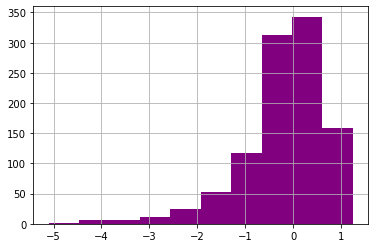

In [786]:
mark_rate['z-score 1'].hist(bins = 10, color = 'purple')

<AxesSubplot:>

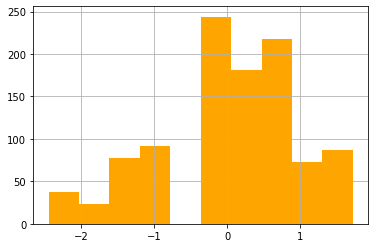

In [787]:
mark_rate['z-score 2'].hist(bins = 10, color = 'orange')

<font color = blue> На графиках видно, что первое распределение стремится к нормальному, а второе вряд ли можно описать таким образом. z-оценки по баллу до пандемии в большинстве свое находятся с в рамках примерно от -2 до 1. Однако есть и заметные выбросы, где значение отклоняется почти на 3 и более среднеквадратичных отклонения. Ниже выведем эти выбросы в виде отдельной таблицы.    
    Распределение оценок по баллам после начала пандемии находится в пределах примерно от -2 до 2, значимых выбросов на графике не наблюдается.

In [788]:
mark_rate[mark_rate['z-score 1'] < -3]
#вывели все наблюдения, которые по z-оценке баллов до пандемии отклоняются больше чем на 3 
#всего 14 наблюдений – 14 учеников имели оценки значительно ниже средней до начала пандемии


,Av. Mark Before Pandemic,Online Performance,z-score 1,z-score 2
35,3,8,-3.693090,0.679463
42,2,4,-4.398519,-1.404828
81,3,10,-3.693090,1.721608
110,3,7,-3.693090,0.158390
302,3,2,-3.693090,-2.446973
363,2,5,-4.398519,-0.883755
401,2,9,-4.398519,1.200535
421,2,8,-4.398519,0.679463
427,3,2,-3.693090,-2.446973
496,2,10,-4.398519,1.721608


<font color = blue> На данном этапе мы не можем дать дополнительный аналитический комментарий касательно этих выбросов. Некоторые из них превышают 5 среднеквадратичных отклонений, но так как в терминах z-распределения отклонение больше, чем на 3, считается крайне маловероятным, можно остановиться на том, что эти данные нуждаются в дополнительной проверке. 

### 5. Корреляция и продвинутая визуализация
#### Проверка наличия взаимосвязи и расчет значения корреляции переменных

<font color = blue> Приступим к изучению корреляций для изучаемого датасета. Для начала с помощью функции corr посмотрим на значения корреляций по всем доступным для вычисления переменным и отберем наиболее релевантные для анализа.

In [789]:
correlation = ed.corr()[['Study Time', 'Sleep Time', 'Social Media Time', 'Av. Mark Before Pandemic', 'Online Performance']]
correlation = correlation.drop('Group Studies Engaged')
correlation

,Study Time,Sleep Time,Social Media Time,Av. Mark Before Pandemic,Online Performance
Age,0.005344,-0.072031,0.005455,-0.206318,0.114965
Number of Subjects,0.024280,0.051531,0.004833,-0.005219,0.012740
Family Size,0.060614,-0.015787,0.053512,-0.049413,0.001549
Internet Facility,-0.011554,0.051838,0.082772,0.112829,0.257339
Sports Involved,-0.050493,0.003573,0.006862,0.001371,0.009961
Monitored by Adults,0.087018,-0.056426,-0.043976,0.010664,0.092616
Study Time,1.000000,-0.044385,-0.125986,0.125797,0.134344
Sleep Time,-0.044385,1.000000,0.144587,0.019971,0.065020
Social Media Time,-0.125986,0.144587,1.000000,-0.152759,-0.086568
Gaming Interested,-0.037480,0.051789,0.075570,-0.102433,0.019462


<font color = blue> Выведем на графики корреляцию между уровнем времени, затрачиваемым на сон и обучение, и оценками до и после начала пандемии.

<AxesSubplot:xlabel='Sleep Time', ylabel='Online Performance'>

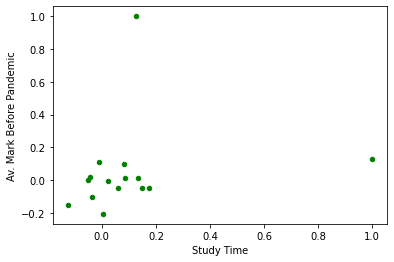

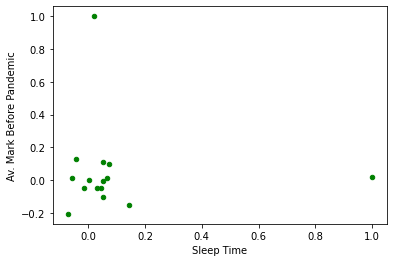

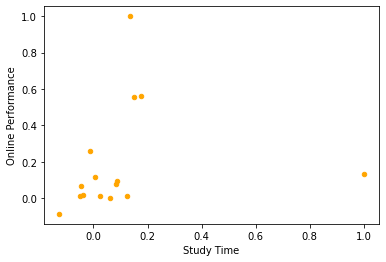

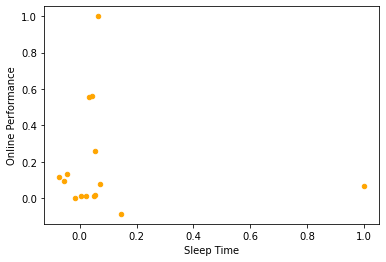

In [790]:
correlation.plot('Study Time', 'Av. Mark Before Pandemic', kind = 'scatter', color = 'green')
correlation.plot('Sleep Time', 'Av. Mark Before Pandemic', kind = 'scatter', color = 'green')
correlation.plot('Study Time', 'Online Performance', kind = 'scatter', color = 'orange')
correlation.plot('Sleep Time', 'Online Performance', kind = 'scatter', color = 'orange')

In [791]:
(corr.abs().unstack().sort_values()).dropna().iloc[50:]

Social Media Time         Doubts                      0.101847
Av. Mark Before Pandemic  Gaming Interested           0.102433
                          Internet Facility           0.112829
Online Performance        Age                         0.114965
Av. Mark Before Pandemic  Study Time                  0.125797
Study Time                Av. Mark Before Pandemic    0.125797
Social Media Time         Study Time                  0.125986
Study Time                Social Media Time           0.125986
                          Online Performance          0.134344
Online Performance        Study Time                  0.134344
Social Media Time         Sleep Time                  0.144587
Sleep Time                Social Media Time           0.144587
Study Time                Online Interaction          0.148859
Av. Mark Before Pandemic  Social Media Time           0.152759
Social Media Time         Av. Mark Before Pandemic    0.152759
Study Time                Doubts                      0

<font color = blue> На первый взгляд среди переменных отсутствует значимая корреляция, близкая к единице. Сгруппируем данные по корреляции с помощью тепловой карты, чтобы визуализировать значения корреляции и выявить наиболее значимые.

#### Визуализация с помощью продвинутых инструментов Python

In [792]:
import seaborn as sns

<AxesSubplot:>

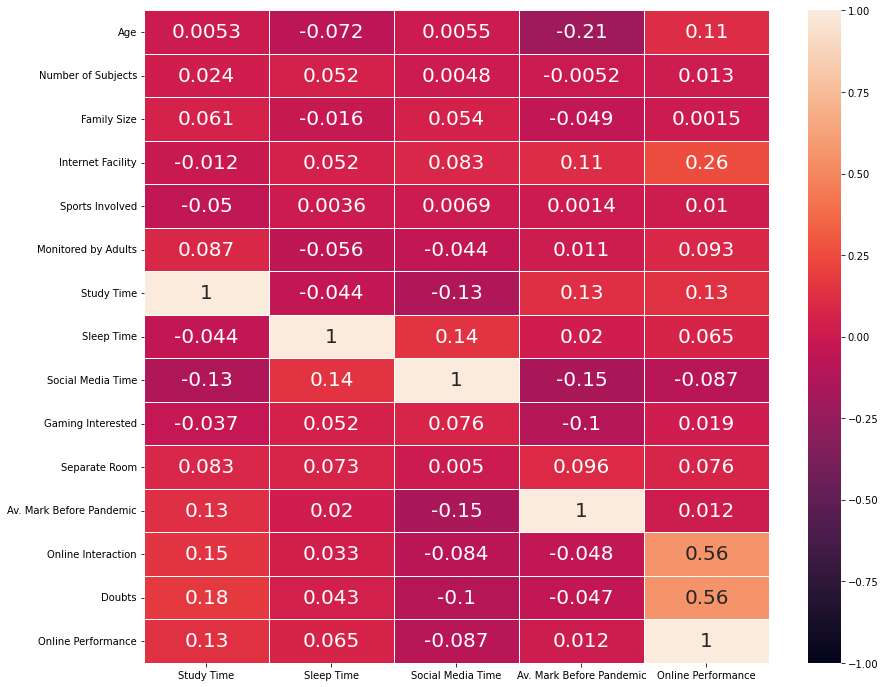

In [793]:
fig, ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, annot = True, linecolor = 'white', linewidth = 0.5,
           annot_kws = {'size':20}, vmax = 1, vmin = -1)

<font color = blue> Далее с помощью инструментов визуализации на столбчатом графике посмотрим, как сгруппированы средние значения доступности интернет-сети по материальному положению студентов.

Text(0.5, 0.98, 'Average Internet Facility Level by Income')

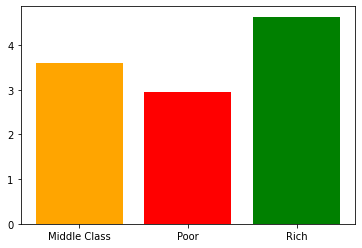

In [794]:
internet_facility = ed.groupby('Economic Status')['Internet Facility'].mean()

plt.bar(internet_facility.index, internet_facility, color = ['orange','red','green'])
fig.suptitle('Average Internet Facility Level by Income', fontsize = 15)
#видим, что показатели интернет-обеспечения прямо пропорционально соотносятся с материальным положением

<font color = blue> Попробуем визуализировать данные на линейном графике – посмотрим, как меняется средняя оценка до пандемии в завимости от возраста студентов. Будем использовать синтаксис построения с помощью двух объектов.

In [795]:
age_mean_mark = ed.groupby('Age')['Av. Mark Before Pandemic'].mean()
age_mean_mark

Age
9      9.500000
12     9.500000
17     8.343434
18     8.568182
19     8.455752
20     8.168675
21     7.897638
22     7.538462
23     7.684211
24     7.857143
25     6.714286
26     8.333333
27     8.000000
28     8.000000
29     8.000000
30     8.000000
32     8.000000
34     7.666667
35    10.000000
36     6.000000
37     7.666667
38    10.000000
39     8.000000
40     6.000000
Name: Av. Mark Before Pandemic, dtype: float64

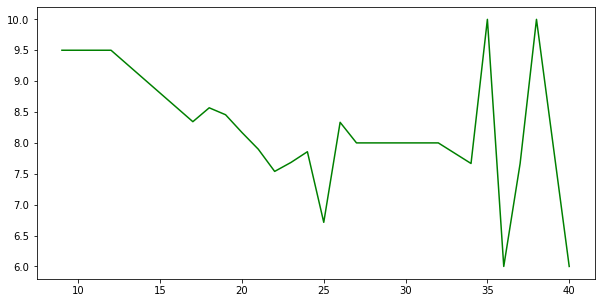

In [796]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(age_mean_mark, color = 'green')

<font color = blue> Наблюдаем значительное снижение средних оценок в возрасте 25, 36 и 40 лет – проверим, сколько наблюдений зафиксировано для этих возрастов, чтобы принять решение о показательности этих данных.  

In [797]:
ed['Age'].value_counts()

20    249
19    226
18    220
21    127
17     99
22     39
23     19
24     14
40      9
25      7
34      3
37      3
26      3
12      2
9       2
39      2
36      2
38      1
27      1
28      1
30      1
32      1
35      1
29      1
Name: Age, dtype: int64

<font color = blue> Видим, что для возраста 25 собрано только 7 наблюдений, для 36 лет – 2, а для 40 лет – 9, так что спад на графике может быть получен за счет малого количества наблюдений и отсутствия усреднения. На эти данные вряд ли можно ссылаться при анализе. Тем не менее, по графику можем сделать выводы о самых часто встречающихся возрастах 17-24 - средняя оценка имеет склонность к снижению с увеличением возраста студентов.

<font color = blue> Далее попробуем создать дополнительный рисунок для визуализации, добавив на него несколько осей координат с собственными данными. Будем использовать группировку – найдем среднюю оценку за онлайн-обучение для всех возрастов и сгруппируем их по уровням материальной обеспеченности.

In [798]:
online_mark_mean = ed.groupby(['Economic Status', 'Age'])['Online Performance'].mean()
online_mark_mean

Economic Status  Age
Middle Class     9       4.500000
                 12      6.000000
                 17      6.322222
                 18      6.756345
                 19      6.604651
                          ...    
Rich             36           NaN
                 37           NaN
                 38           NaN
                 39     10.000000
                 40           NaN
Name: Online Performance, Length: 72, dtype: float64

In [799]:
ed['Online Performance'].mean()
#еще раз узнаем среднюю оценку по всему датасету, чтобы нанести значение на график для сравнения

6.696030977734753

Text(0.5, 0.98, 'Average online performance by income')

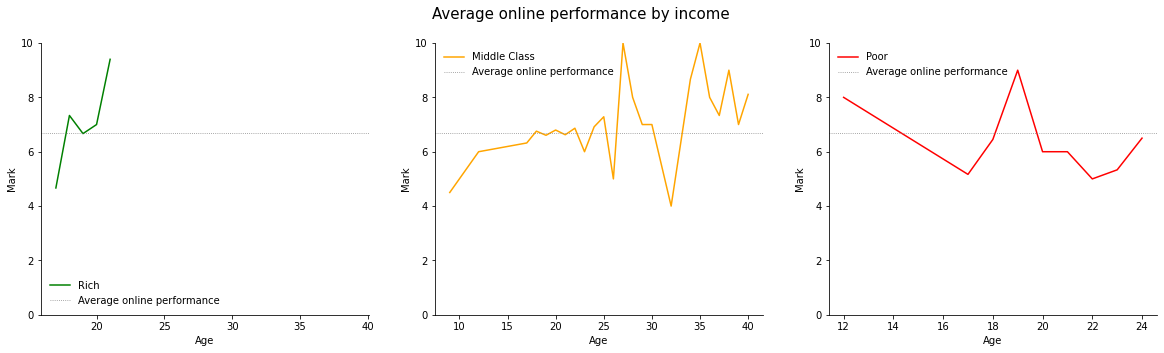

In [800]:
fig, ax = plt.subplots(1,3, figsize = (20,5))

ax[0].plot(online_mark_mean.loc['Rich'], color = 'green')
ax[1].plot(online_mark_mean.loc['Middle Class'], color = 'orange')
ax[2].plot(online_mark_mean.loc['Poor'], color = 'red')

for axis in ax.ravel():
    axis.set_ylim(0, 10)
    axis.set_xlabel('Age')
    axis.set_ylabel('Mark')
    axis.axhline(6.69, c = 'grey', lw = 0.8, ls = ':')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
ax[0].legend(['Rich', 'Average online performance'], frameon = False)
ax[1].legend(['Middle Class', 'Average online performance'], frameon = False)
ax[2].legend(['Poor', 'Average online performance'], frameon = False)

fig.suptitle('Average online performance by income', fontsize = 15)

<font color = blue> На данных графиках мы можем наглядно видеть, как меняется средняя оценка за онлайн-обучение в зависимости от возраста по классам материальной обеспеченности.

### 6. Тестирование гипотез 
#### 1) Постановка и тестирование гипотез, непараметрические критерии (расчет критерия хи-квадрат)

<font color = blue> Для начала сформулируем гипотезы для имеющихся данных:  
    ***H0: вовлеченность студентов в спортивные занятия не зависит от пола.***  
      
  <font color = blue>  Уровень значимости alpha выберем равным 1%.

In [801]:
ct_o_1 = ed.groupby('Sex')['Sports Involved'].value_counts().unstack()
ct_o_1
#выведем таблицу сопряженности

Sports Involved,False,True
Sex,,
Female,320,99
Male,343,271


<font color = blue> Насчем с рассчета степени свободы и базовых вычислений для расчета критерия хи-квадрат. 

$
dof = (R - 1)(C - 1)
$

In [802]:
alpha = 0.01
dof = (2-1)*(2-1)
print(dof)

critical_value_1 = 6.63 #критическое значение для степени свободы = 1 и уровня значимости 0,01

1


In [803]:
n_total = ct_o_1.sum().sum() #рассчитываем общее кол-во наблюдений
print(n_total)

1033


In [804]:
n_target_0 = ct_o_1[0].sum() #кол-во человек, не увлекающихся спортом
n_target_1 = ct_o_1[1].sum() #кол-во человек, увлекающихся спортом

print(n_target_0, n_target_1)

663 370


In [805]:
p_target_0 = n_target_0/n_total #вероятность того что студент не интересуется спортом
p_target_1 = n_target_1/n_total #вероятность того что студент интересуется спортом

print(p_target_0, p_target_1)

0.6418199419167473 0.35818005808325265


In [806]:
n_women = ct_o_1.iloc[0].sum() #кол-во женщин
n_men = ct_o_1.iloc[1].sum() #кол-во мужчин

print(n_women, n_men)

419 614


<font color = blue> Далее рассчитаем теоретические частоты для 4 групп данных:  

In [807]:
f_e_target_0_women = n_women * p_target_0 #теоретическая частота для женщин, не увлекающихся спортом
f_e_target_1_women = n_women * p_target_1 #теоретическая частота для женщин, увлекающихся спортом

print(f_e_target_0_women, f_e_target_1_women)

268.9225556631171 150.07744433688285


In [808]:
f_e_target_0_men = n_men * p_target_0 #теоретическая частота для мужчин, не увлекающихся спортом
f_e_target_1_men = n_men * p_target_1 #теоретическая частота для мужчин, увлекающихся спортом

print(f_e_target_0_men, f_e_target_1_men)

394.0774443368828 219.92255566311712


<font color = blue> Чтобы рассчитать хи-квадрат, необходимо собрать матрицу теоретических (ожидаемых) частот.

In [809]:
ct_e_1 = np.array([[f_e_target_0_women,f_e_target_1_women], #частоты для женщин
               [f_e_target_0_men, f_e_target_1_men]]) #частоты для мужчин

print(ct_e_1)

[[268.92255566 150.07744434]
 [394.07744434 219.92255566]]


In [810]:
ct_o_1[0].sum() * ct_o_1.iloc[0].sum() / n_total 
#проверяем правильность полученных данных с помощью дополнительного способа

268.9225556631171

In [811]:
chi_square_1 = ((ct_o_1 - ct_e_1)**2 / ct_e_1).sum().sum() #рассчитываем значение критерия хи-квадрат

In [812]:
print(chi_square_1, critical_value_1)
print(chi_square_1 > critical_value_1)
#проверяем, может ли нулевая гипотеза, поставленная в начале анализа, быть отвергнута

45.568175090053806 6.63
True


<font color = blue> Получаем результат, который позволяет нам отвергнуть нулевую гипотезу о независимости наличия спортивных увлечений от пола – гипотеза H0 может быть отвергнута с уровнем значимости 99%, зависимость между двумя анализируемыми категориями, вероятно, все-таки существует.     
    
<font color = blue>  Ниже проверим правильность ручных расчетов с помощью функции из библиотеки scipy.stats.

In [813]:
scipy.stats.chi2_contingency(ct_o_1, correction = False)
#в качестве аргумента передаем матрицу наблюдаемых частот, коррекцию отключим

(45.56817509005384,
 1.474174170538731e-11,
 1,
 array([[268.92255566, 150.07744434],
        [394.07744434, 219.92255566]]))

<font color = blue> Проверим еще одну гипотезу:  
    ***H0: заинтересованность студентов в получении практических или теоретических знаний не зависит от пола.***
    
<font color = blue>  Уровень значимости alpha также выберем равным 1%.

In [814]:
ct_o_2 = ed.groupby('Sex')['Interested in?'].value_counts().unstack()
ct_o_2
#выведем таблицу сопряженности

,Both,Practical,Theory
Sex,,,
Female,117,172,130
Male,230,267,117


In [815]:
alpha = 0.01
dof = (2-1)*(3-1)
print(dof)

critical_value_2 = 9.21 #критическое значение для степени свободы = 2 и уровня значимости 0,01

2


In [816]:
scipy.stats.chi2_contingency(ct_o_2)
#в качестве аргумента передаем матрицу наблюдаемых частот

(22.014788822916472,
 1.6578657021319118e-05,
 2,
 array([[140.74830591, 178.06485963, 100.18683446],
        [206.25169409, 260.93514037, 146.81316554]]))

In [817]:
chi_square_2 = 22.014788822916472
print(chi_square_2, critical_value_2)
print(chi_square_2 > critical_value_2)

22.014788822916472 9.21
True


<font color = blue> Снова получаем результат, который позволяет нам отвергнуть нулевую гипотезу о независимости наличия предпочтений о получении практических/теоретических знаний от пола – гипотеза H0 может быть отвергнута с уровнем доверия 99%, зависимость между двумя анализируемыми категориями, вероятно, все-таки существует.

<font color = blue> Проверим третью одну гипотезу:  
    ***H0: Уровень удовлетворенности онлайн-образованием не зависит от наличия заинтересованности геймингом.***
    
<font color = blue>  Уровень значимости alpha также выберем равным 1%.

In [818]:
ct_o_3 = ed.groupby('Gaming Interested')['Satisfaction Level'].value_counts().unstack()
ct_o_3
#выведем таблицу сопряженности

,Average,Good,Bad
Gaming Interested,,,
False,256,110,107
True,285,141,134


In [819]:
alpha = 0.01
dof = (2-1)*(3-1)
print(dof)

critical_value_3 = 9.21 #критическое значение для степени свободы = 2 и уровня значимости 0,01

2


In [820]:
scipy.stats.chi2_contingency(ct_o_3)
#в качестве аргумента передаем матрицу наблюдаемых частот

(1.0886296423978057,
 0.5802392147780309,
 2,
 array([[247.71829622, 114.9303001 , 110.35140368],
        [293.28170378, 136.0696999 , 130.64859632]]))

In [821]:
chi_square_3 = 1.0886296423978057
print(chi_square_3, critical_value_3)
print(chi_square_3 > critical_value_3)

1.0886296423978057 9.21
False


<font color = blue> При тестировании последней гипотезы получаем значение, которое НЕ позволяет нам отвергнуть нулевую гипотезу о независимости наличия увлечения геймингом и удовлетворенностью онлайн-образованием – гипотеза H0 не может быть отвергнута с уровнем доверия 99%, зависимость между двумя анализируемыми категориями не зафиксирована.

#### 2) Параметрические критерии, t-тест

<font color = blue> Далее попробуем решать задачи на проверку статистических гипотез с использованием t-критерия.  
    Для начала попробуем протестировать следующую гипотезу:  
    
<font color = blue> ***H0: Не существует разницы между средним количеством сна у студентов, за которыми следят родители и тех, кто обучается полностью самостоятельно.*** 
    
 <font color = blue> Будем использовать двусторонний тест, уровень статистической значимости alpha = 0.05

In [822]:
monitored = ed[ed['Monitored by Adults'] == True]['Sleep Time']
not_monitored = ed[ed['Monitored by Adults'] == False]['Sleep Time']

<font color = blue> Проверим, подходят ли наши выборки под условие использования t-тест – посмотрим на то, является ли распределение нормальным.

<AxesSubplot:>

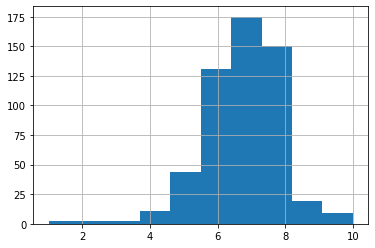

In [823]:
monitored.hist(bins=10)

<AxesSubplot:>

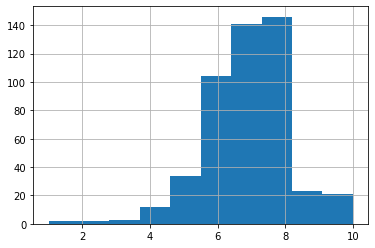

In [824]:
not_monitored.hist(bins=10)

<font color = blue> В целом видим, что на графиках распределения стремятся к нормальному, но отметим перекос влево для второй группы студентов. В рамках данного анализа будем считать, что критерий нормальности соблюден. Далее проверим следующее условие – одинаковость дисперсии для выборок.

In [825]:
print(monitored.var())
print(not_monitored.var())

1.5786090124123027
1.9397406335207168


<font color = blue> Видим, что дисперсии близки по своему значению, но не идентичны – попробуем использовать не классический t-критерий Стьюдента, а посчитаем степени свободы с поправкой Уэлча.

In [826]:
ddof = len(monitored) + len(not_monitored) - 2
print(ddof)
#степени свободы для классического t-критерия Стьюдента для случая полного равенства дисперсий

1031


In [827]:
n_1 = len(not_monitored)
n_2 = len(monitored)
var_1 = not_monitored.var()
var_2 = monitored.var()
print(n_1, n_2, var_1, var_2)

488 545 1.9397406335207168 1.5786090124123027


In [828]:
v_1 = var_1/n_1
v_2 = var_2/n_2

dof_welch = (v_1 + v_2)**2 / (v_1**2/(n_1 - 1) + v_2**2/(n_2 - 1))
int(dof_welch)
#более консервативный метод расчета с поправкой Уэлча

986

<font color = blue> Для полученного значения степени свободы значение t-критерия будет равно +- 2.5807 согласно таблице распределения Стьюдента.  

<font color = blue> Далее определим функцию, которая будет проверять, можем ли мы отвергнуть нулевую гипотезу в соответствии с полученным t-критерием, а затем расчитаем само значение t-критерия.

In [829]:
def hypothesis_check(t, t_critical):
    if abs(t) > t_critical:
        print('Отвергаем H0. Разница между средними статистически значима.')
    else: 
         print('Не удалось отвергнуть H0')

t_critical = 2.5807

In [830]:
s_m1_m2 = np.sqrt(v_1 + v_2) #рассчитываем стандартную ошибку
s_m1_m2

0.08289396024670762

In [831]:
mean_1 = not_monitored.mean() #находим среднее двух выборок
mean_2 = monitored.mean()
print(mean_1, mean_2)

7.026639344262295 6.877064220183486


In [832]:
t = (mean_1 - mean_2) / s_m1_m2 #рассчитываем t-критерий
t

1.8044152267987443

In [833]:
hypothesis_check(t, t_critical)

Не удалось отвергнуть H0


<font color = blue> По результатам проверки мы получили результат, согласно которому мы не можем отвергнуть выдвинутую гипотезу о том, что не существует разницы между средним количеством сна у студентов, за которыми следят родители и тех, кто обучается полностью самостоятельно. На данном этапе мы можем сделать вывод, что разница, вероятно, не является статистически значимой.  
    
<font color = blue>  Ниже проверим правильность ручных расчетов с помощью функции из библиотеки scipy.stats.

In [834]:
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1, #передаем заранее рассчитанные статистики
                                mean_2, np.sqrt(var_2), n_2,
                                equal_var = False) #указываем, что будем использовать поправку Уэлча
#получаем данные, равные тем, что были найдены вручную

Ttest_indResult(statistic=1.8044152267987443, pvalue=0.07147114653171384)

In [835]:
scipy.stats.ttest_ind(not_monitored, monitored, equal_var = False)
#также получаем данные, равные тем, что были найдены вручную и предыдущим способом

Ttest_indResult(statistic=1.8044152267987432, pvalue=0.07147114653171398)

<font color = blue> Найдем также границы доверительного интервала. Получим результат, на основании которого с вероятностью 95% мы можем утверждать, что разница между средними располагается в интервале от -0.06 до 0.36.

In [836]:
CI_bottom = (mean_1 - mean_2) - t_critical*s_m1_m2 #находим нижнюю границу доверительного интервала
CI_top = (mean_1 - mean_2) + t_critical*s_m1_m2 #находим верхнюю границу доверительного интервала
print(CI_bottom, CI_top)

-0.06434931912986935 0.3634995672874874


### 7. Построение уравнений регрессии 
#### 1) Линейная регрессия – простая и мультивариативная

<font color = blue> Для начала применим метод вычисления линейной регрессии с помощью инструментов библиотеки  statsmodels.api.

In [837]:
import statsmodels.api as sm

<font color = blue> Соберем агрегированные данные по 4 характеристикам студентов – контроль родителей, средняя оценка за онлайн-обучение, среднее время сна и учебы – и сгруппируем по возрасту, затем выведем в отдельный датафрейм для дальнейшей работы с ним.

In [838]:
monitored_sum = ed.groupby(ed['Age'])['Monitored by Adults'].sum()
perf_mean = ed.groupby(ed['Age'])['Online Performance'].mean()
sleep_mean = ed.groupby(ed['Age'])['Sleep Time'].mean()
study_mean = ed.groupby(ed['Age'])['Study Time'].mean()

ed_age = pd.concat([monitored_sum, perf_mean, sleep_mean, study_mean], axis = 1)
ed_age.head()

,Monitored by Adults,Online Performance,Sleep Time,Study Time
Age,,,,
9,1,4.500000,8.500000,2.500000
12,1,7.000000,9.000000,6.000000
17,64,6.202020,7.151515,3.969697
18,133,6.736364,6.990909,4.531818
19,112,6.659292,6.884956,4.376106


<font color = blue> Для построения модели линейной регрессии необходимо проверить ряд предпосылок, чтобы убедиться в том, имеет ли смысл использовать модель для данных и будет ли иметь смысл интерпретация этой модели. Проверим 2 предпосылки до построения модели:   

<font color = blue>    1) в данных не должны быть мультиколинеарности – для этого выведем тепловую карту на график и убедимся, что корреляции для имеющихся данных вполне умеренные

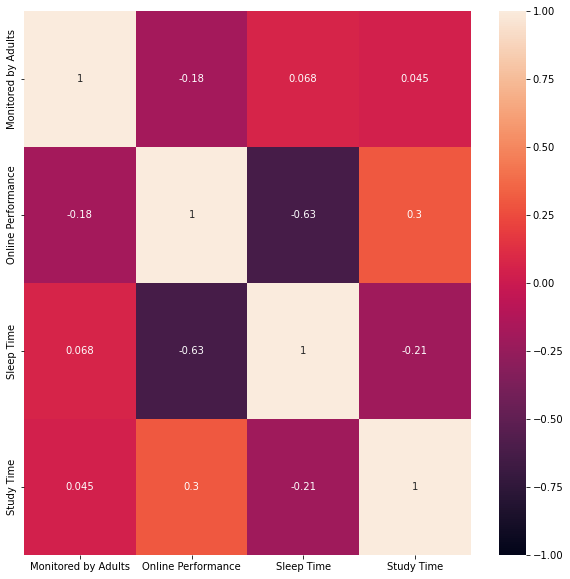

In [839]:
plt.figure(figsize = (10,10))
p = sns.heatmap(ed_age.corr(), annot = True, vmin = -1, vmax = 1)

<font color = blue> 2) далее необходимо проверить наличие линейной взаимосвязи: выведем парные графики рассеивания и увидим, что не для всех наблюдений мы можем констатировать наличие взаимосвязи.   
    В рамках данного анализа будем считать, что критерий соблюден, однако будем иметь в виду, что эта предпосылка выполняется не на 100%.

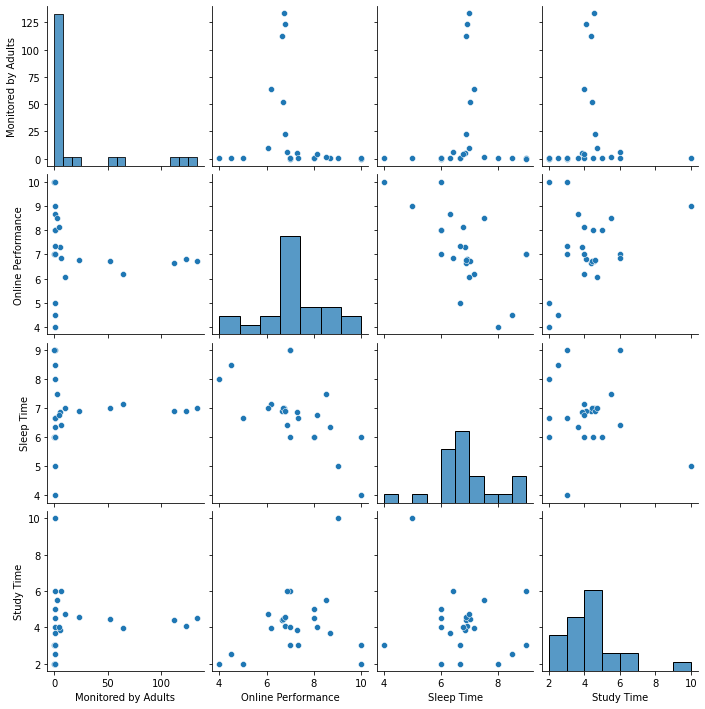

In [840]:
sns.pairplot(ed_age)

<font color = blue> Построим 2 модели: в первую очередь будем анализировать ту, в которую включим один предиктор – возьмем данные по оценке и количеству времени, потраченного студентами на сон.  
    Для начала воспользуемся функцией из библиотеки scipy.stats.

In [841]:
X = ed_age['Sleep Time'] #сохраняем данные о времени сна в переменную X
y = ed_age['Online Performance'] #сохраняем данные об оценках в переменную y

res = scipy.stats.linregress(X, y)
res
#получаем кортеж значений линейной регресии

LinregressResult(slope=-0.8343200068562139, intercept=12.86000438180955, rvalue=-0.6275739753171212, pvalue=0.0010278188406489524, stderr=0.22067176624210227, intercept_stderr=1.5232411261389478)

In [842]:
r_sq = res.rvalue ** 2 #вычислим коэффициент детерминации
r_sq

#получаем коэффициент детерминации, равный ~0,4 – это не слишком высокий показатель, будем учитывать это в дальнейшем
#наша модель на 40% объясняет дисперсию в целевой переменной

0.3938490944953347

<font color = blue> По результатам полученных значений построим график рассеяния для двух переменных, чтобы визулизировать распределение оригинальных данных и линию регрессии. В целом, можем увидеть, что линия регрессии и реальные значения не идентичны, но относительно близки. Тем не менее, ошибки также достаточно легко заметить – в этих случаях реальные значения находятся максимально далеко от предсказанных на линии регрессии.

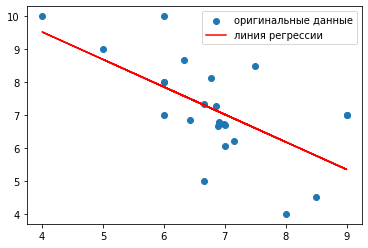

In [843]:
plt.scatter(X, y, label = 'оригинальные данные')
plt.plot(X, res.intercept + res.slope * X, c = 'r', label = 'линия регрессии')
plt.legend()
plt.show()

<font color = blue> Теперь посмотрим, как построить уравнение линейной регрессии с помощью библиотеки statsmodels.api.  
    Снова в первую очередь будем анализировать модель с одним предиктором, чтобы затем сравнить результаты с теми, которые получены по предыдущему методу расчета. 

In [844]:
X_simple = ed_age['Sleep Time']
y = ed_age['Online Performance']
X_simple_constant = sm.add_constant(X_simple) #добавляем константу в X

model = sm.OLS(y, X_simple_constant) #передаем сначала y, затем X
res_simple = model.fit()
print(res_simple.summary()) #выводим результаты

                            OLS Regression Results                            
Dep. Variable:     Online Performance   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     14.29
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00103
Time:                        20:02:11   Log-Likelihood:                -37.069
No. Observations:                  24   AIC:                             78.14
Df Residuals:                      22   BIC:                             80.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8600      1.523      8.443      0.0

<font color = blue> Коэффициент детерминации согласно результатам равен 0.394, что совпадает со значением, которое было рассчитано вручную выше. Также видим, что коэффициент переменной "Sleep Time" совпадает по значению с полученным ранее (=-0.83), как и коэффициент свободного члена (intercept), который равен 12.86 в обоих случаях. Важно отметить, что согласно полученному данным по линейной регрессии, оба коэффициента стат. значимы.

<font color = blue> Далее построим мультивариативную регрессию – линейную регрессию с несколькими предикторами. Включим все переменные, кроме зависимой – оценки во время получения образования в формате онлайн.

In [845]:
X_mult = sm.add_constant(ed_age.drop('Online Performance', axis = 1))

model = sm.OLS(y, X_mult)
res_mult = model.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:     Online Performance   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     5.371
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00707
Time:                        20:02:13   Log-Likelihood:                -35.986
No. Observations:                  24   AIC:                             79.97
Df Residuals:                      20   BIC:                             84.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.8591    

<font color = blue> Отметим, что коэффициент детерминации вырос по сравнению со значением предыдущего уровнения линейной регресии – стал равен 0.446 (был 0.394). Можем сделать вывод, что добавление новых переменных в модель слегка улучшило ее –  теперь наша модель объясняет дисперсию в целевой переменной не на 40%, а на 45%. Наблюдения по контролю старших родственников и часам сна имеют отрицательные коэффициенты, что показывает обратную зависимость. Однако, если мы выбираем уровень доверия alpha=0.05, то наблюдения по столбцам "Monitored by Adults" и "Study Time" не могут быть названы статистически значимыми. 

#### 2) Логистическая регрессия

<font color = blue> Приступим к нахождению логистической регрессии. Будем анализировать данные по полу, наличию спортивных увлечений, наличию контроля со стороны взрослых, наличию увлечения компьютерными играми и вовлечения в деятельность исследовательских групп, а также по средним оценкам до и после начала пандемии и степени вовлеченности в процесс онлайн-образования – выведем все эти наблюдения в отдельном датасете.

In [859]:
df = ed[['Sex','Age', 'Sports Involved','Monitored by Adults','Gaming Interested',
    'Av. Mark Before Pandemic', 'Online Performance', 'Online Interaction']]

df

,Sex,Age,Sports Involved,Monitored by Adults,Gaming Interested,Av. Mark Before Pandemic,Online Performance,Online Interaction
0,Male,18,False,True,False,10,6,1
1,Male,19,True,True,True,10,3,1
2,Male,18,False,True,False,8,6,1
3,Male,18,True,True,False,10,4,1
4,Male,18,False,False,True,9,6,3
...,...,...,...,...,...,...,...,...
1028,Female,19,True,True,True,10,8,4
1029,Female,20,False,False,True,8,10,5
1030,Female,20,False,False,False,8,6,2
1031,Female,19,True,False,True,7,6,3


In [860]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Male' else 0) 
#перекодируем пол в бинарную переменную

In [861]:
cols_num = ['Age','Av. Mark Before Pandemic', 'Online Performance', 'Online Interaction'] 
#отдельно запишем все количественные переменные

In [862]:
X = sm.add_constant(df['Sex']) #в качестве предиктора будем использовать пол
y = df['Sports Involved'] #в качестве целевой переменной будем использовать показатель увлечения спортом

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.629670
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Sports Involved   No. Observations:                 1033
Model:                          Logit   Df Residuals:                     1031
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                 0.03479
Time:                        20:03:37   Log-Likelihood:                -650.45
converged:                       True   LL-Null:                       -673.89
Covariance Type:            nonrobust   LLR p-value:                 7.528e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1732      0.115    -10.201      0.000      -1.399      -0.948
Sex            0.9376      0.

<font color = blue> Видим, что оба коэффициента статистически значимы. Вспомним, что коэффициент логистической регресии это логарифм шанса (отношения вероятности того что событие наступит к вероятности того, что оно не наступит) –
    $
ln(\frac{p}{1-p})
$.   
    Для того чтобы интерпретировать коэффициенты, необходимо их для начала экспонировать.

In [863]:
np.exp(-1.1732)

#если предиктор равен 0, то шанс наличия заинтересованности спортом будет равен 0.3, 
#то есть для женщин эта вероятность в 3 раза меньше

0.30937535443851255

In [864]:
np.exp( 0.9376)

#если предиктор равен 1, то шанс наличия заинтересованности спортом будет равен 2.55
#то есть для мужчин шанс наступления события почти 2.5 к 1

2.553844829777106

<font color = blue> Рассчитаем свободный член – для этого построим таблицу сопряженности, чтобы использовать частоты оттуда и посчитать вероятность принадлежности к той или иной группе.

In [865]:
df.groupby('Sports Involved')['Sex'].value_counts().unstack()

,1,0
Sports Involved,,
False,343,320
True,271,99


In [866]:
p_1_female = 99 / (99+320) #вероятность наступления события для женщин
p_0_female = 1 - p_1_female #вероятность ненаступления события для женщин
odds_1_female = p_1_female / p_0_female #рассчитываем шанс

print(odds_1_female)
print(np.log(odds_1_female))

0.309375
-1.1732011456591822


<font color = blue> Далее попробуем построить логистическую регрессию для всех переменных, которые имеются в анализируемом датасете, предварительно перекодировав некоторые переменные в буллиевые.

In [867]:
df['Sports Involved'] = df['Sports Involved'].apply(lambda x: 1 if x == True else 0) 
df['Monitored by Adults'] = df['Monitored by Adults'].apply(lambda x: 1 if x == True else 0) 
df['Gaming Interested'] = df['Gaming Interested'].apply(lambda x: 1 if x == True else 0) 

In [870]:
X = sm.add_constant(df.drop(['Sports Involved'], axis = 1)) #в качестве предикторов используем все переменные
y = df['Sports Involved'] #в качестве целевой переменной будем использовать показатель увлечения спортом

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.621095
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Sports Involved   No. Observations:                 1033
Model:                          Logit   Df Residuals:                     1025
Method:                           MLE   Df Model:                            7
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                 0.04793
Time:                        20:04:29   Log-Likelihood:                -641.59
converged:                       True   LL-Null:                       -673.89
Covariance Type:            nonrobust   LLR p-value:                 1.808e-11
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4561      0.692     -3.549      0.000      -3.812

<font color = blue> Псевдо-коэффициент детерминации увеличился, что может быть свидетельством более высокого качества этой модели по сравнению с предыдущей. Обратим внимание, что не все переменные статистически значимы, при alpha=0.05 это пол, наличие контроля со стороны взрослых и интерес к компьютерным играм. Экспонируем коэффициенты для интерпретации. 

In [871]:
np.exp(0.9178)

#если предиктор по полу равен 1, то шанс наличия заинтересованности спортом будет равен 2.5 
#то есть для мужчин эта вероятность почти в 2.5 раза больше

2.5037760191104756

In [872]:
np.exp(0.3143)

#если предиктор по контролю равен 1, то шанс наличия заинтересованности спортом будет равен 1.36
#то есть для тех, кого контролируют родители эта вероятность в 1.36 раза больше

1.3693004650745384

In [873]:
np.exp(0.3601)

#если предиктор по интересу к играм равен 1, то шанс наличия заинтересованности спортом будет равен 1.43
#то есть для тех, кто интересуется играми эта вероятность в 1.43 раза больше

1.4334727546686823

<font color = blue> Теперь выполним регрессионный анализ для всех количественных переменных, которые мы собирали вначале анализа. В качестве последнего пункта анализа применим 1) центрирование, чтобы интерпретировать изменения относительно средних значений; 2) стандартизацию, чтобы привести к z-распределению.

In [882]:
X = sm.add_constant(df[cols_num] - df[cols_num].mean()) #из каждой колонки вычитаем ее среднее
y = df['Sports Involved']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651521
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        Sports Involved   No. Observations:                 1033
Model:                          Logit   Df Residuals:                     1028
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                0.001292
Time:                        20:37:15   Log-Likelihood:                -673.02
converged:                       True   LL-Null:                       -673.89
Covariance Type:            nonrobust   LLR p-value:                    0.7832
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.5843      0.065     -8.994      0.000      -0.712

In [885]:
X = sm.add_constant((df[cols_num] - df[cols_num].mean()) / df[cols_num].std())
#из каждой колонки вычитаем ее среднее и делим на среднеквадратичное отклонение
#теперь можем интерпретировать все изменения как изменения не на единицы, а на одно ст. отклонение
y = df['Sports Involved']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651521
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        Sports Involved   No. Observations:                 1033
Model:                          Logit   Df Residuals:                     1028
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                0.001292
Time:                        20:43:14   Log-Likelihood:                -673.02
converged:                       True   LL-Null:                       -673.89
Covariance Type:            nonrobust   LLR p-value:                    0.7832
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.5843      0.065     -8.994      0.000      -0.712